[0.         1.86033578]


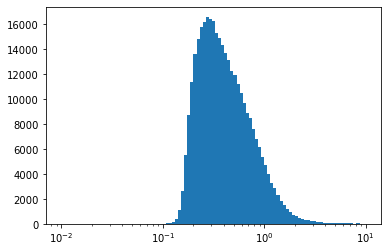

In [12]:
import numpy as np
import fitsio
from matplotlib import pyplot as plt
import settings_north as settings

truth = fitsio.read(settings.truth_fn)
print(np.percentile(truth['rhalf'],q=[0.,99.]))
bins = np.logspace(-2,1,100)
plt.hist(truth['rhalf'],bins=bins)
plt.xscale('log')
plt.show()

In [15]:
def isELG_colors(gflux=None, rflux=None, zflux=None, south=True, gmarg=0., grmarg=0., rzmarg=0., primary=None):
    """
    Apply ELG selection with box enlarged by ``gmarg``, ``grmarg``, ``rzmarg``.

    Base selection from https://github.com/desihub/desitarget/blob/master/py/desitarget/cuts.py.
    """
    if primary is None:
        primary = np.ones_like(rflux, dtype='?')
    elg = primary.copy()

    # ADM work in magnitudes instead of fluxes. NOTE THIS IS ONLY OK AS
    # ADM the snr masking in ALL OF g, r AND z ENSURES positive fluxes.
    g = 22.5 - 2.5*np.log10(gflux.clip(1e-16))
    r = 22.5 - 2.5*np.log10(rflux.clip(1e-16))
    z = 22.5 - 2.5*np.log10(zflux.clip(1e-16))

    # ADM cuts shared by the northern and southern selections.
    elg &= g > 20 - gmarg                          # bright cut.
    elg &= r - z > 0.3 - rzmarg                    # blue cut.
    elg &= r - z < 1.6 + rzmarg                    # red cut.
    elg &= g - r < -1.2*(r - z) + 1.6 + grmarg     # OII flux cut.

    # ADM cuts that are unique to the north or south.
    if south:
        elg &= g < 23.4 + gmarg # faint cut.
        # ADM south has the FDR cut to remove stars and low-z galaxies.
        elg &= g - r < 1.15*(r - z) - 0.15 + grmarg
    else:
        elg &= g < 23.5 + gmarg # faint cut.
        elg &= g - r < 1.15*(r - z) - 0.20 + grmarg # remove stars and low-z galaxies.

    return elg


[0.         3.45497756] 147.66854858398438
37.16431833852434 -4.482771988682373


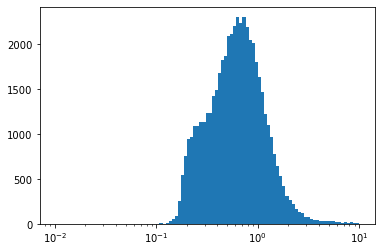

In [21]:
gflux = 10**((truth['g'] - 22.5)/-2.5)
rflux = 10**((truth['r'] - 22.5)/-2.5)
zflux = 10**((truth['z'] - 22.5)/-2.5)
mask = isELG_colors(gflux=gflux, rflux=rflux, zflux=zflux, south=True, gmarg=0.5, grmarg=0.5, rzmarg=0.5)

print(np.percentile(truth['rhalf'][mask],q=[0.,99.]),truth['rhalf'][mask].max())
argmax = truth['rhalf'][mask].argmax()
print(truth['ra'][mask][argmax],truth['dec'][mask][argmax])
bins = np.logspace(-2,1,100)
plt.hist(truth['rhalf'][mask],bins=bins)
plt.xscale('log')
plt.show()